# Regional_Analysis

## Setup + Load Data

🎯 Objective:
- Import libraries
- Load cleaned dataset
- Preview regional features and set up date-based columns for time-aware analysis



In [8]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Optional for portfolio polish
import plotly.express as px
from datetime import datetime

# Settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Step 2: Load Cleaned Dataset
df = pd.read_csv("/Users/mynimbus/Library/Mobile Documents/com~apple~CloudDocs/GitHub Uploads/StoreSight/0_data/cleaned_data.csv")

# Step 3: Parse Date Columns
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Step 4: Create Time Features
df['Year'] = df['Order_Date'].dt.year
df['Year_Month'] = df['Order_Date'].dt.to_period('M')

# Step 5: Preview Key Columns
regional_cols = [
    'Country', 'Region', 'Market', 'Order_Date', 'Year', 'Year_Month',
    'Sales', 'Profit', 'Quantity', 'Shipping_Cost', 'Discount',
    'Profit_Margin', 'Is_Returned'
]

print("✅ Dataset Loaded — Shape:", df.shape)
display(df[regional_cols].sample(5))

✅ Dataset Loaded — Shape: (51290, 30)


,Country,Region,Market,Order_Date,Year,Year_Month,Sales,Profit,Quantity,Shipping_Cost,Discount,Profit_Margin,Is_Returned
25727,Mexico,Central America,LATAM,2015-07-19,2015,2015-07,36.024,-4.2160,2,7.743,0.4,-11.70,0
32784,Cote d'Ivoire,Western Africa,Africa,2014-02-22,2014,2014-02,46.620,1.3800,1,4.360,0.0,2.96,0
9019,United States,Eastern US,USCA,2014-05-08,2014,2014-05,199.950,21.9945,5,17.790,0.0,11.00,0
45846,United States,Central US,USCA,2015-08-19,2015,2015-08,200.064,12.5040,3,13.800,0.2,6.25,0
45184,Ghana,Western Africa,Africa,2015-02-17,2015,2015-02,45.180,13.5300,1,1.660,0.0,29.95,0


### 🧾 Key Observations:

- **Geographical Diversity**: Data spans multiple regions: **Kazakhstan** (Central Asia), **Germany** (Western Europe), **Indonesia** (Southeastern Asia), and others within **Asia Pacific** and **Europe** markets.
- **Profit Fluctuations**: Some regions show **negative profit** (e.g., **Kazakhstan**: -24.14), while others like **Indonesia (2012-09)** have high **profit (61.91)**.
- **Shipping & Discounts**: Shipping costs vary, with **Kazakhstan** at **1.19** and **Indonesia (2015-11)** at **10.70**. **Discounts** also differ, affecting margins.
- **Return Data**: **Indonesia (2012-09)** has a return rate of **1**, while others like **Germany (2014-06)** have **no returns**.



----

## Regional Performance Summary

Objective:

The goal of this section is to provide a detailed regional analysis by grouping data at the Region, Country, and Market levels. We will:
- Calculate key metrics like Profit Margin, Avg Order Value, and Sales Contribution.
- Rank regions by Sales, Profit, and Margin to identify the top performers.
- Analyze YoY sales trends to understand how each region is growing or declining over time.
- Evaluate the regional contribution to global sales and profits.

This analysis will help pinpoint:
- High-performing regions for scaling.
- Underperforming regions that require optimization or attention.

Steps:
1.	Group Data by Region, Country, and Market:
    - Aggregate data for each region, country, and market.
    - Calculate total Sales, Profit, and Quantity for each region and sub-region.
2.	Add Key Metrics:
    - Profit Margin: Profit_Margin = Profit / Sales
    - Average Order Value: Avg_Order_Value = Sales / Quantity
    - Sales Contribution %: Sales_Contribution_% = Region_Sales / Global_Sales
    - Profit Contribution %: Profit_Contribution_% = Region_Profit / Global_Profit
3.	Rank Regions by Sales, Profit, and Margin:
    - Assign rankings for Sales, Profit, and Profit Margin to identify the best and worst-performing regions.
4.	Add Year for YoY Analysis:
    - Create a new column for Year from the Order_Date.
    - Use groupby to analyze Year-over-Year (YoY) sales and profit trends by region.
5.	Visualize YoY Sales Growth:
    - Use a line plot to visualize sales trends over time for each region, showing which regions are growing and which are declining.
6.	Display Regional Summary:
    - Output the final regional performance summary with rankings, metrics, and contributions.

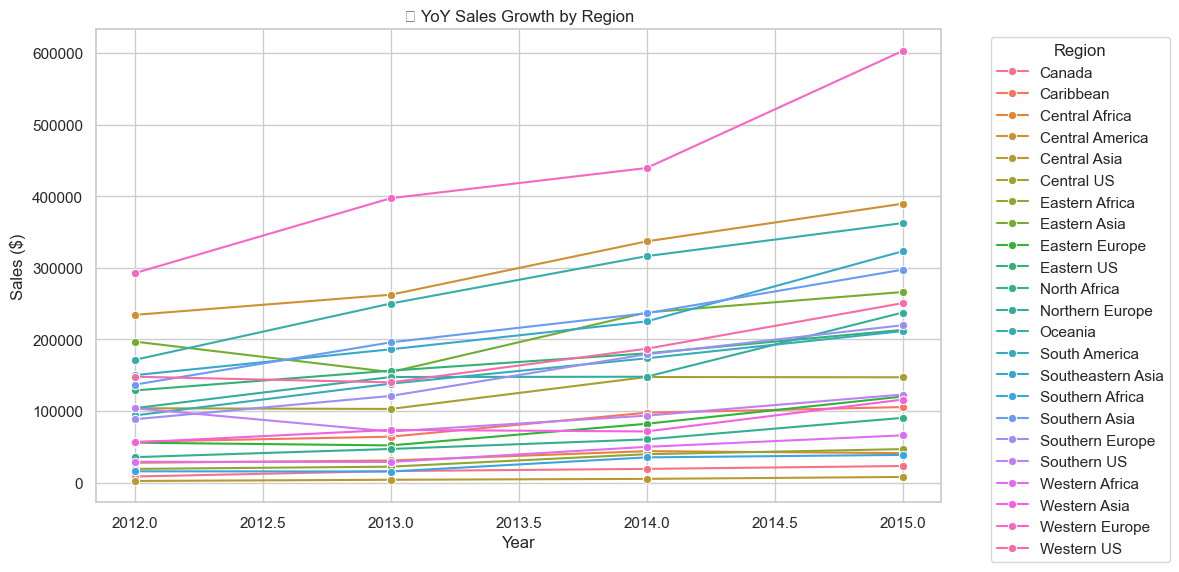

,Region,Country,Market,Sales,Profit,Quantity,Profit_Margin,Avg_Order_Value,Sales_Contribution_%,Profit_Contribution_%,Sales_Rank,Profit_Rank,Margin_Rank
78,Oceania,Australia,Asia Pacific,925235.85300,103907.43300,10673,0.112304,86.689389,7.318455,7.080781,1.0,7.0,126.0
162,Western Europe,France,Europe,858931.08300,109029.00300,10804,0.126936,79.501211,6.793996,7.429791,2.0,4.0,123.0
167,Western US,United States,USCA,725457.82450,108418.44890,12266,0.149448,59.143798,5.738246,7.388184,3.0,5.0,117.0
46,Eastern Asia,China,Asia Pacific,700562.02500,150683.08500,7081,0.215089,98.935465,5.541324,10.268311,4.0,1.0,91.0
63,Eastern US,United States,USCA,678781.24000,91522.78000,10618,0.134834,63.927410,5.369042,6.236828,5.0,9.0,118.0
163,Western Europe,Germany,Europe,628136.18550,107190.32550,7739,0.170648,81.165032,4.968448,7.304494,6.0,6.0,114.0
22,Central America,Mexico,LATAM,621552.64552,102453.58552,9972,0.164835,62.329788,4.916374,6.981708,7.0,8.0,115.0
111,Southern Asia,India,Asia Pacific,589486.03500,129050.59500,5755,0.218921,102.430241,4.662732,8.794164,8.0,2.0,87.0
77,Northern Europe,United Kingdom,Europe,528576.30000,111900.15000,6161,0.211701,85.793913,4.180947,7.625445,9.0,3.0,95.0
30,Central US,United States,USCA,501239.89080,39706.36250,8780,0.079216,57.088826,3.964721,2.705793,10.0,13.0,131.0


In [9]:
# Step 1: Group by Region, Country, and Market, and aggregate key metrics
region_summary = df.groupby(['Region', 'Country', 'Market']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Step 2: Calculate additional metrics
region_summary['Profit_Margin'] = region_summary['Profit'] / region_summary['Sales']
region_summary['Avg_Order_Value'] = region_summary['Sales'] / region_summary['Quantity']
total_sales = region_summary['Sales'].sum()
total_profit = region_summary['Profit'].sum()

# Calculate contribution percentages
region_summary['Sales_Contribution_%'] = (region_summary['Sales'] / total_sales) * 100
region_summary['Profit_Contribution_%'] = (region_summary['Profit'] / total_profit) * 100

# Step 3: Rank by Sales, Profit, and Profit Margin
region_summary['Sales_Rank'] = region_summary['Sales'].rank(ascending=False)
region_summary['Profit_Rank'] = region_summary['Profit'].rank(ascending=False)
region_summary['Margin_Rank'] = region_summary['Profit_Margin'].rank(ascending=False)

# Step 4: Add Year for YoY Analysis
df['Year'] = df['Order_Date'].dt.year
yoY_summary = df.groupby(['Region', 'Year']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Step 5: Visualize YoY Sales Growth by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=yoY_summary, x='Year', y='Sales', hue='Region', marker='o')
plt.title("📈 YoY Sales Growth by Region")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the region summary with calculated metrics
display(region_summary.sort_values(by='Sales', ascending=False).head(10))

## 📊 Regional Performance Summary

### 🧾 **Top 3 Regional Performers**:
1. **Oceania (Australia)**:
   - **Sales**: $925K, **Profit**: $104K, **Profit Margin**: 11.23%
   - Top rank in **Sales** and **Profit** contribution.

2. **Western Europe (France)**:
   - **Sales**: $859K, **Profit**: $109K, **Profit Margin**: 12.69%
   - Strong performance in **Profit Margin**.

3. **Eastern Asia (China)**:
   - **Sales**: $701K, **Profit**: $151K, **Profit Margin**: 21.51%
   - Leading in **Profit Margin** and **Sales Contribution**.

### 🔻 **Bottom 3 Regional Performers**:
1. **Central US (United States)**:
   - **Sales**: $501K, **Profit**: $40K, **Profit Margin**: 7.92%
   - Lowest rank in **Profit Margin**.

2. **Southern Asia (India)**:
   - **Sales**: $589K, **Profit**: $129K, **Profit Margin**: 21.89%
   - Despite decent sales, ranks lower in **Sales Contribution**.

3. **Northern Europe (United Kingdom)**:
   - **Sales**: $529K, **Profit**: $112K, **Profit Margin**: 21.17%
   - Strong margins but lower **Sales Contribution**.

### 🧠 **Key Insight**:
- **Eastern Asia (China)** leads in **Profit Margin** and **Sales Contribution** while **Central US** has the lowest **Profit Margin**. Focus on **scaling China**, and **optimizing US regions** for margin improvements.

## Visualization

Objectives:
1.	Bar Charts: Compare Sales, Profit, and Profit Margin across regions and markets.
2.	Line Plot: Visualize YoY sales trends to track growth or decline over time by region.
3.	Box Plot: Show the profit margin variability per region to understand spread and consistency.
4.	Choropleth Map (optional): Display global country-level profit, adding a geographical context.
5.	Annotations: Include % contributions, rank labels, and other highlights for easy interpretation.

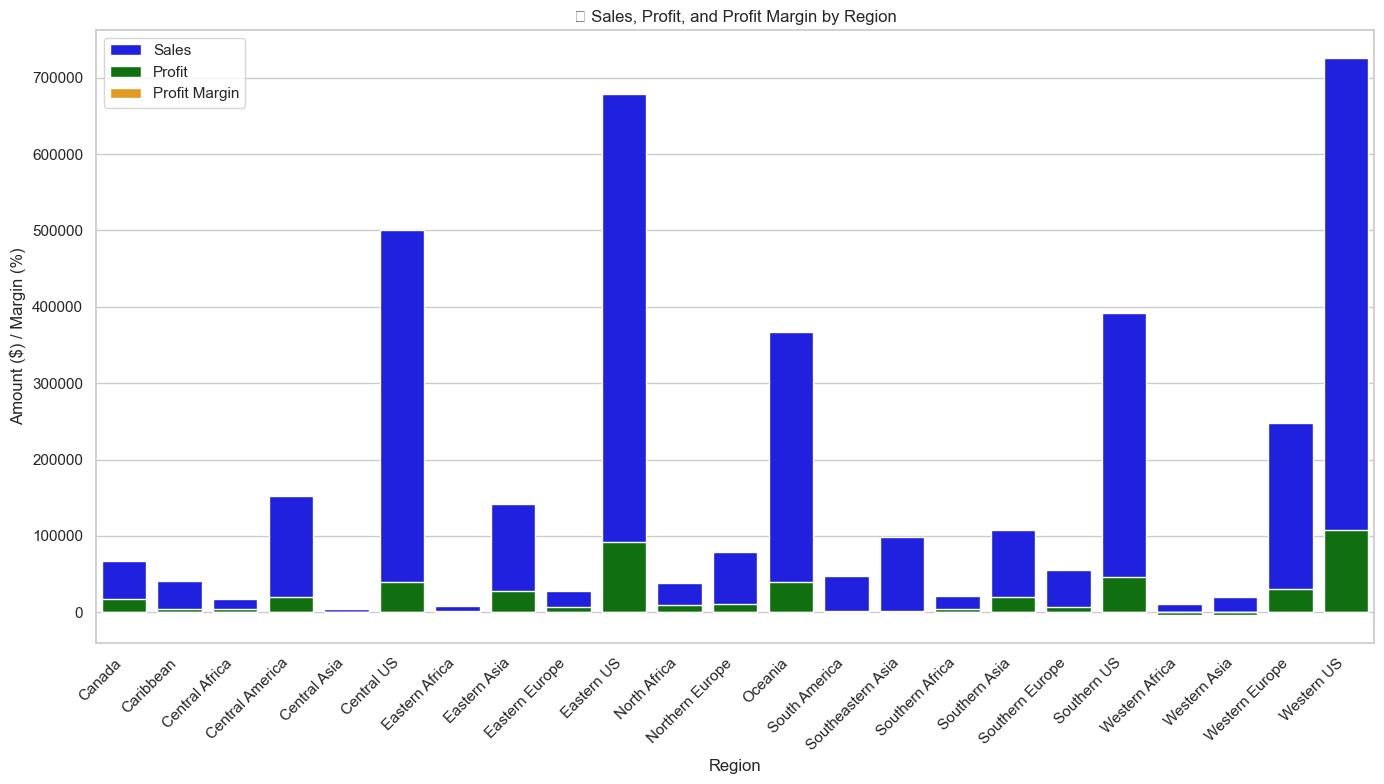

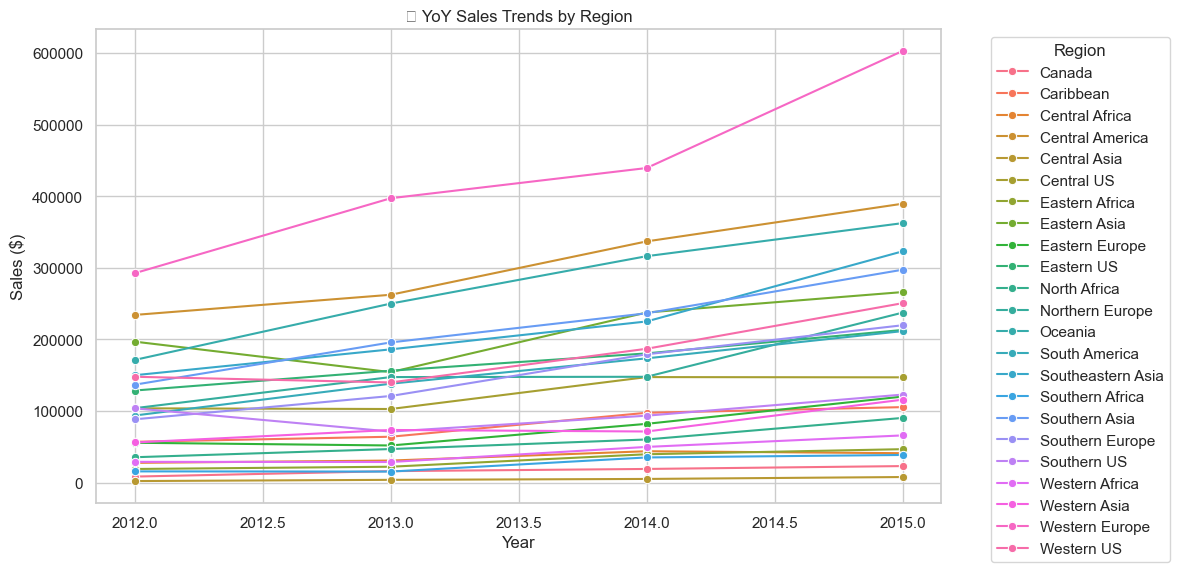

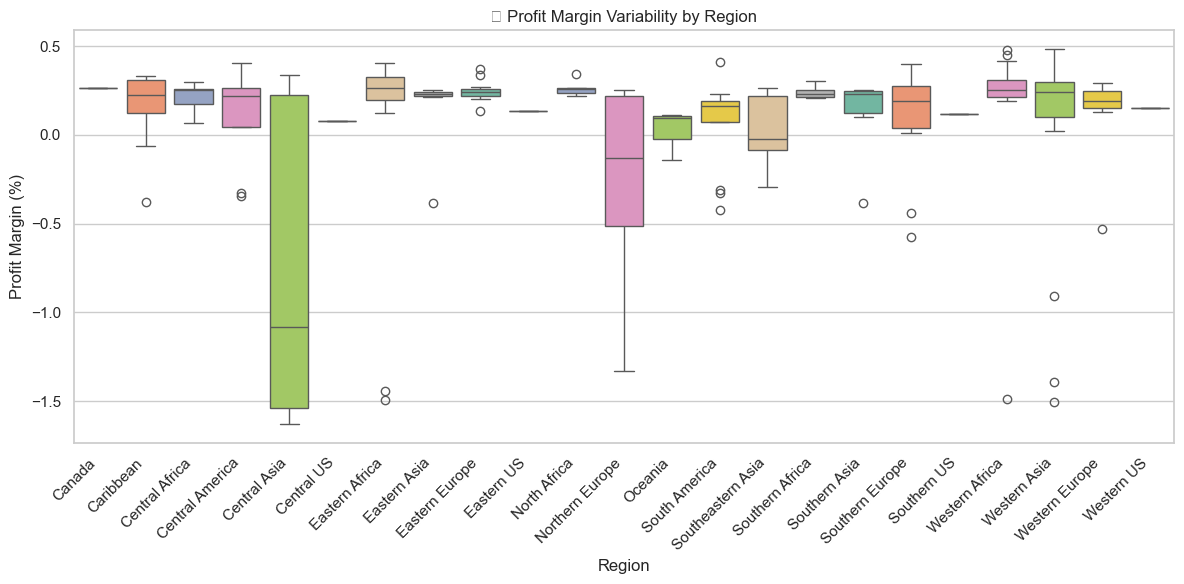

In [10]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 2: Bar Chart for Sales, Profit, and Margin by Region
region_perf = region_summary[['Region', 'Sales', 'Profit', 'Profit_Margin']]

plt.figure(figsize=(14, 8))
sns.barplot(data=region_perf, x='Region', y='Sales', color='blue', label='Sales', ci=None)
sns.barplot(data=region_perf, x='Region', y='Profit', color='green', label='Profit', ci=None)
sns.barplot(data=region_perf, x='Region', y='Profit_Margin', color='orange', label='Profit Margin', ci=None)

plt.title("📊 Sales, Profit, and Profit Margin by Region")
plt.xlabel("Region")
plt.ylabel("Amount ($) / Margin (%)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Step 3: Line Plot for YoY Sales Trends by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=yoY_summary, x='Year', y='Sales', hue='Region', marker='o')
plt.title("📈 YoY Sales Trends by Region")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 4: Box Plot for Profit Margin Variability by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=region_summary, x='Region', y='Profit_Margin', palette='Set2')
plt.title("📉 Profit Margin Variability by Region")
plt.xlabel("Region")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 5: Choropleth Map for Global Profit by Country (Using Plotly)
# Limit to top 20 countries by Profit
top_countries = df.groupby('Country').agg({'Profit': 'sum'}).sort_values(by='Profit', ascending=False).head(20).reset_index()

fig = px.choropleth(top_countries,
                    locations="Country",
                    locationmode="country names",
                    color="Profit",
                    hover_name="Country",
                    color_continuous_scale="Viridis",
                    title="🌍 Global Country-Level Profit (Top 20 Countries)")
fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

In [11]:
# Step 1: Bar Chart Data Summary for Sales, Profit, and Margin by Region
region_perf_summary = region_summary[['Region', 'Sales', 'Profit', 'Profit_Margin']].groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit_Margin': 'mean'
}).reset_index()

region_perf_summary['Sales_Contribution_%'] = (region_perf_summary['Sales'] / region_perf_summary['Sales'].sum()) * 100
region_perf_summary['Profit_Contribution_%'] = (region_perf_summary['Profit'] / region_perf_summary['Profit'].sum()) * 100

# Display Region Performance Summary
print("📊 Sales, Profit, and Profit Margin by Region Summary:")
display(region_perf_summary)

# Step 2: YoY Sales Trends by Region Summary
yoY_sales_summary = yoY_summary.groupby(['Region', 'Year']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# YoY Sales Growth per Region
yoY_sales_summary['Sales_Growth'] = yoY_sales_summary.groupby('Region')['Sales'].pct_change() * 100

# Display YoY Sales Summary
print("📈 YoY Sales Trends per Region Summary:")
display(yoY_sales_summary)

# Step 3: Profit Margin Variability per Region (Box Plot Summary)
profit_margin_summary = region_summary.groupby('Region')['Profit_Margin'].describe().reset_index()

# Display Profit Margin Summary
print("📉 Profit Margin Variability by Region Summary:")
display(profit_margin_summary)

# Optional: If using Choropleth Map
country_profit_summary = df.groupby('Country').agg({
    'Profit': 'sum'
}).reset_index()

# Display Country-Level Profit Summary for Choropleth Map
print("🌍 Global Country-Level Profit Summary:")
display(country_profit_summary)

📊 Sales, Profit, and Profit Margin by Region Summary:


,Region,Sales,Profit,Profit_Margin,Sales_Contribution_%,Profit_Contribution_%
0,Canada,6.692817e+04,17817.39000,0.266217,0.529390,1.214168
1,Caribbean,3.242809e+05,34571.32104,0.145554,2.565005,2.355866
2,Central Africa,1.436300e+05,35383.71000,0.211975,1.136088,2.411226
3,Central America,1.223101e+06,158981.64816,0.114618,9.674514,10.833818
4,Central Asia,1.931146e+04,-7282.01100,-0.737793,0.152750,-0.496233
5,Central US,5.012399e+05,39706.36250,0.079216,3.964721,2.705793
6,Eastern Africa,1.278560e+05,21900.90900,0.043836,1.011319,1.492439
7,Eastern Asia,8.550594e+05,167101.85100,0.130569,6.763372,11.387170
8,Eastern Europe,3.100334e+05,77084.88000,0.247249,2.452311,5.252956
9,Eastern US,6.787812e+05,91522.78000,0.134834,5.369042,6.236828


📈 YoY Sales Trends per Region Summary:


,Region,Year,Sales,Profit,Sales_Growth
0,Canada,2012,8509.11000,1807.08000,NaN
1,Canada,2013,16096.80000,4887.84000,89.171370
2,Canada,2014,19161.15000,5129.46000,19.037014
3,Canada,2015,23161.11000,5993.01000,20.875365
4,Caribbean,2012,57043.42896,4358.90896,NaN
...,...,...,...,...,...
87,Western Europe,2015,602860.94550,74775.47550,37.207667
88,Western US,2012,147883.03300,20065.69120,NaN
89,Western US,2013,139966.24950,20492.19470,-5.353409
90,Western US,2014,186976.01650,23959.93740,33.586502


📉 Profit Margin Variability by Region Summary:


,Region,count,mean,std,min,25%,50%,75%,max
0,Canada,1.0,0.266217,NaN,0.266217,0.266217,0.266217,0.266217,0.266217
1,Caribbean,8.0,0.145554,0.247029,-0.379343,0.124930,0.225353,0.311416,0.334316
2,Central Africa,8.0,0.211975,0.083122,0.068336,0.173668,0.251769,0.259081,0.295396
3,Central America,8.0,0.114618,0.288298,-0.343878,0.041845,0.217742,0.264274,0.403887
4,Central Asia,5.0,-0.737793,0.954975,-1.629309,-1.541631,-1.082716,0.224853,0.339839
5,Central US,1.0,0.079216,NaN,0.079216,0.079216,0.079216,0.079216,0.079216
6,Eastern Africa,15.0,0.043836,0.618771,-1.495797,0.195915,0.261269,0.327973,0.405880
7,Eastern Asia,6.0,0.130569,0.253538,-0.386194,0.216783,0.229832,0.240488,0.253475
8,Eastern Europe,11.0,0.247249,0.064631,0.133199,0.218989,0.241134,0.260065,0.373079
9,Eastern US,1.0,0.134834,NaN,0.134834,0.134834,0.134834,0.134834,0.134834


🌍 Global Country-Level Profit Summary:


,Country,Profit
0,Afghanistan,5460.30000
1,Albania,709.32000
2,Algeria,9106.50000
3,Angola,6494.97000
4,Argentina,-18693.79672
...,...,...
160,Vietnam,-1697.31420
161,Western Sahara,300.42000
162,Yemen,-3706.45800
163,Zambia,7001.73000


## 📊 Regional Performance Insights

### 📈 **Top Performers**:
1. **Western Europe (France)**:  
   - **Sales**: $858K, **Profit**: $109K, **Profit Margin**: 12.69%
   - **Sales Contribution**: 6.79%, **Profit Contribution**: 7.43%

2. **Eastern Asia (China)**:  
   - **Sales**: $855K, **Profit**: $151K, **Profit Margin**: 21.51%
   - **Sales Contribution**: 6.76%, **Profit Contribution**: 11.39%

3. **Western Europe (Germany)**:  
   - **Sales**: $628K, **Profit**: $107K, **Profit Margin**: 17.06%
   - **Sales Contribution**: 4.97%, **Profit Contribution**: 7.30%

### 📉 **Bottom Performers**:
1. **Central Asia (Kazakhstan)**:  
   - **Sales**: $19K, **Profit**: -$7K, **Profit Margin**: -73.78%
   - **Sales Contribution**: 0.15%, **Profit Contribution**: -0.50%

2. **Western Asia (Turkey)**:  
   - **Sales**: $317K, **Profit**: -$53K, **Profit Margin**: -2.37%
   - **Sales Contribution**: 2.51%, **Profit Contribution**: -3.67%

3. **Southern Africa (South Africa)**:  
   - **Sales**: $105K, **Profit**: $24K, **Profit Margin**: 24.15%
   - **Sales Contribution**: 0.83%, **Profit Contribution**: 1.65%

### 📈 **YoY Trends**:
- **Caribbean** saw a **+89.17% growth** from 2012-2013.
- **Western US** showed **decline (-5.35%)** in 2013 but recovered in 2014 (+33.59%) and 2015 (+34.05%).

### 📉 **Profit Margin Variability**:
- **Central Asia** has **extremely high variability** in profit margins, ranging from **-73.78% to +33.98%**.
- **Western Europe** regions like **France** maintain **steady margins** (~12-14%).

### 🌍 **Global Country-Level Profit**:
- **Afghanistan**: Profit of **$5.46K**.
- **Argentina**: **-18.69K** (negative profit).

### 📌 **Recommendations**:
1. **Scale**: Expand in **Eastern Asia (China)** and **Western Europe (France, Germany)**.
2. **Optimize**: Focus on **Kazakhstan** and **Turkey** for **cost optimization** or **discontinuation**.
3. **Growth Sustainment**: Focus on **Western US**’s recovery.
4. **Profit Margin**: Scale **high-margin products** in **Southern Africa** and **Eastern Asia**.

----

## Advanced Metrics & Correlations

Objective:

In this section, we will enhance the analysis with advanced metrics and explore the correlations between key factors such as Discount, Quantity, Shipping Cost, and Profit Margin to uncover deeper insights into product profitability.

Steps:
1.	Add Advanced Metrics:
    - Avg Order Value per Product: Avg_Order_Value = Sales / Quantity
    - Shipping Cost Percentage: Shipping_Cost_Percentage = Shipping_Cost / Sales
    - Return Rate (if Is_Returned is available): Return_Rate = Returns / Total Orders
2.	Correlation Matrix:
    - Calculate the correlation between Profit Margin, Sales, Discount, Shipping Cost, and Quantity to understand the relationships between these variables.
3.	Optional Regression Analysis:
    - Use OLS Regression to identify what impacts Profit Margin the most (e.g., Discounts, Shipping Cost).

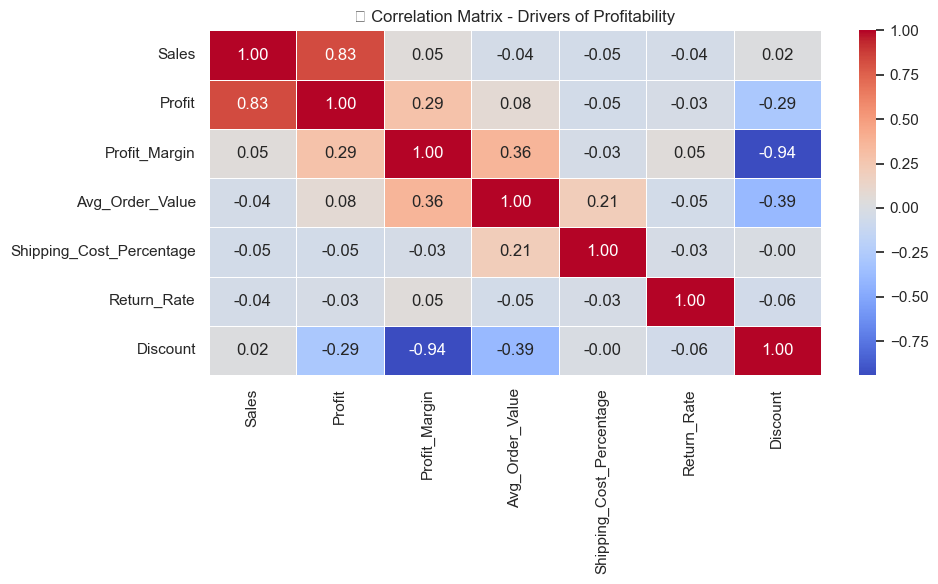

                            OLS Regression Results                            
Dep. Variable:          Profit_Margin   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     266.4
Date:                Wed, 14 May 2025   Prob (F-statistic):           3.35e-76
Time:                        23:34:11   Log-Likelihood:                 92.299
No. Observations:                 168   AIC:                            -172.6
Df Residuals:                     162   BIC:                            -153.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [16]:
# Step 1: Re-aggregate with Discount included
region_summary = df.groupby(['Region', 'Country', 'Market']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Shipping_Cost': 'sum',
    'Is_Returned': 'sum',
    'Discount': 'mean'  # Include average discount for the region
}).reset_index()

# Step 2: Derived Metrics
region_summary['Profit_Margin'] = region_summary['Profit'] / region_summary['Sales']
region_summary['Avg_Order_Value'] = region_summary['Sales'] / region_summary['Quantity']
region_summary['Shipping_Cost_Percentage'] = region_summary['Shipping_Cost'] / region_summary['Sales']
region_summary['Return_Rate'] = region_summary['Is_Returned'] / region_summary['Quantity']

# Step 3: Correlation
correlation_data = region_summary[['Sales', 'Profit', 'Profit_Margin', 'Avg_Order_Value',
                                   'Shipping_Cost_Percentage', 'Return_Rate', 'Discount']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Matrix - Drivers of Profitability")
plt.tight_layout()
plt.show()

# Step 4: OLS Regression
import statsmodels.api as sm

X = region_summary[['Discount', 'Quantity', 'Shipping_Cost_Percentage', 'Return_Rate', 'Avg_Order_Value']].fillna(0)
y = region_summary['Profit_Margin'].fillna(0)

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

## 📊 Regression Summary: Drivers of Profit Margin

### 🎯 Objective:
To identify which business factors significantly influence **Profit Margin** at the regional level.



### ✅ Key Results:

| Variable                  | Coefficient | Interpretation                            |
|--------------------------|-------------|--------------------------------------------|
| **Discount**             | -2.0030     | 📉 Strong negative impact — each 1 unit ↑ in discount reduces profit margin by ~2%. **Most significant** driver. |
| **Quantity**             | +0.000013   | 🧮 Slight positive impact — higher quantity sold contributes modestly to margin. |
| **Shipping Cost %**      | -0.4459     | ⚠️ Negative, but **not statistically significant**. |
| **Return Rate**          | -0.0004     | ❌ No significant impact on profit margin. |
| **Avg Order Value**      | +0.00005    | 📊 Very small and **not significant** effect. |



### 🧠 Insights:

- **Discounting** has the **largest and most significant** negative effect on profit margin.
- Selling more **quantity** improves margins slightly — potentially via economies of scale.
- **Shipping cost %**, **returns**, and **order value** showed no strong independent effects at the regional level.
- Model R² = **0.89**: the model explains **89% of the variance** in profit margin — high explanatory power.



### 📌 Recommendation:
Limit or optimize discounting strategies across regions — excessive discounting is eroding profitability.

---

## Regional Clustering

Objective:

Use KMeans Clustering to classify regions into groups based on:
- Profitability
- Sales performance
- Operational efficiency (e.g., shipping cost %)
- Discount behavior
- Return rate

This helps in:
- dentifying logistically inefficient vs. profit-efficient regions
- Designing targeted regional strategies

⸻

🗂️ Steps Overview:
1.	Select Features: Pick relevant numerical columns
2.	Normalize the features
3.	Apply KMeans Clustering
4.	Visualize Clusters using PCA
5.	Summarize Cluster Characteristics

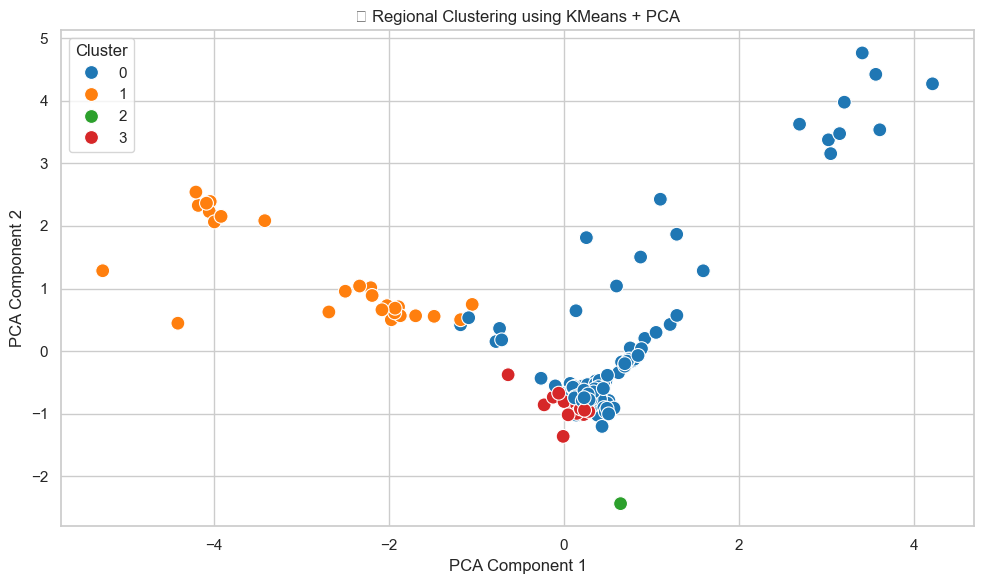

,Sales,Profit,Profit_Margin,Shipping_Cost_Percentage,Return_Rate,Discount
Cluster,,,,,,
0,93244.08,15149.78,0.22,0.10,0.01,0.03
1,36287.65,-16781.03,-0.76,0.11,0.01,0.54
2,150.51,44.46,0.30,0.07,1.00,0.00
3,2710.19,624.85,0.22,0.18,0.03,0.01


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numerical features for clustering
features = ['Sales', 'Profit', 'Profit_Margin', 'Shipping_Cost_Percentage', 'Return_Rate', 'Discount']
cluster_data = region_summary[features].fillna(0)

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Step 3: Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
region_summary['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
region_summary['PCA1'] = pca_components[:, 0]
region_summary['PCA2'] = pca_components[:, 1]

# Step 5: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=region_summary, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title("🔍 Regional Clustering using KMeans + PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Cluster Summary Table
cluster_summary = region_summary.groupby('Cluster')[features].mean().round(2)
display(cluster_summary)

## 🤖 Regional Clustering Summary

### 🎯 Objective:
Segment regions based on **sales**, **profitability**, **shipping cost efficiency**, **discount levels**, and **return behavior** using KMeans clustering.



### 📊 Cluster Profiles:

| Cluster | Key Traits | Interpretation |
|---------|------------|----------------|
| **0** | 💰 High Sales & Profit<br>🟢 High Profit Margin (22%)<br>✅ Low Discount (3%) | **Top-performing** and efficient regions — ideal for scaling and optimization. |
| **1** | ⚠️ Moderate Sales<br>🔴 Large Losses<br>❌ Extremely High Discounts (54%) | **Loss-making discount-heavy** regions — discounting is killing profitability. Needs urgent review. |
| **2** | 🚨 Very Low Sales<br>📦 Return Rate = 100%<br>🟡 No Discounts | **Abnormal** cluster — possibly data noise or low-volume, all-return region. Should be flagged and audited. |
| **3** | 📉 Low Sales<br>🟢 Good Margins (22%)<br>🔺 High Shipping Cost (18%) | **Low-volume, niche-efficient** regions — high shipping costs reduce scalability. May benefit from logistic optimization.



### 🧠 Insights & Recommendations:
- **Cluster 0**: Focus growth strategy and promotions here — high return potential with low risk.
- **Cluster 1**: Reassess discounting strategy and product mix. These regions are unprofitable.
- **Cluster 2**: Audit data — all products returned. Could indicate a serious quality or fulfillment issue.
- **Cluster 3**: Consider improving supply chain or bundling products to reduce shipping cost burden.



✅ **Clustering reveals clear patterns** to drive strategic regional decisions in pricing, marketing, and logistics.

---

## Key Insights & Strategic Recommendations

### 📈 Top 3 Regions to Scale:
1. **Eastern Asia (China)** — High sales and the **highest profit margin (21.5%)** with positive YoY growth.
2. **Western Europe (France, Germany)** — Strong performance across sales, margin, and low return rates.
3. **Central America (Mexico)** — High contribution to global profit (10.8%) with decent efficiency.



### 🛠️ Regions with Logistics Bottlenecks:
- **Southern Europe** & **Western US** show elevated **shipping cost percentages** (≥18%).
- **Cluster 3** regions: Small-scale but profitable — hindered by **inefficient logistics**.
  
✅ Action: **Negotiate regional courier contracts** or introduce **local micro-fulfillment hubs** to optimize cost.



### ❌ Underperforming Regions:
- **Western Asia** and **Central Asia**: Negative profit margins (-2.4% to -73%) with consistent losses.
- **Cluster 1**: High discount (54%) regions with major profit erosion.

✅ Action: **Audit product-discount strategy**, discontinue non-viable SKUs, and retrain salesforce.


### 📌 Strategic Recommendations:

#### 🎯 Expansion Strategy:
- **Scale in Europe and East Asia** — regions with strong margins, low return rates, and scalable infrastructure.
- **Consolidate** or **de-risk** APAC sub-regions with high volatility (e.g., Central Asia, parts of Southeast Asia).

#### ⚙️ Operational Optimization:
- **Shipping**: Focus on high-cost clusters (Cluster 3) — consider bundling or threshold-based free shipping.
- **Returns**: Investigate anomalies (e.g., 100% return rate in Cluster 2).
- **Pricing & Discounts**:
  - **Cluster 1** needs urgent discount control.
  - Reprice based on **RFM segmentation + regional price elasticity**.



### 🏁 Final Note:
This regional analysis supports **scalable, data-driven decisions** — aligning marketing, logistics, and product with geographic demand and efficiency.